In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("rideshare_sample.csv")

In [4]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1544952608,9,16,12,12/16/2018 9:30,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1543284024,2,27,11,11/27/2018 2:00,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1543366822,1,28,11,11/28/2018 1:00,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1543553583,4,30,11,11/30/2018 4:53,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1543463360,3,29,11,11/29/2018 3:49,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [5]:
data.shape

(20, 57)

In [6]:
df = pd.read_csv('My_Uber_Drives - 2016.csv')

In [7]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [8]:
df.shape

(1156, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 36.2+ KB


In [10]:
df.isnull().sum().sum()

507

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.shape

(653, 7)

In [13]:
def remove_outliers(data):
    q25 = np.percentile(data, 25)
    q75 = np.percentile(data, 75)
    iqr = q75 - q25
    limit_iqr = 1.5*iqr
    lower_iqr = q25 - limit_iqr
    upper_iqr = q75 + limit_iqr

    outliers_index_iqr = [x for x in data if x < lower_iqr or x > upper_iqr]
    data_new_iqr = [x for x in data if x >= lower_iqr and x <= upper_iqr]
    
    if len(outliers_index_iqr) > 0:
        print('Number of outliers: %d' % len(outliers_index_iqr))
        print('Non-outlier observations: %d' % len(data_new_iqr))
    else:
        print('Not detect outliers')
    return (data_new_iqr)

In [14]:
df['MILES*']

0        5.1
2        4.8
3        4.7
4       63.7
5        4.3
        ... 
1150     0.7
1151     3.9
1152    16.2
1153     6.4
1154    48.2
Name: MILES*, Length: 653, dtype: float64

In [15]:
data = df['MILES*']
data.shape

(653,)

In [16]:
new_data = remove_outliers(data)

Number of outliers: 45
Non-outlier observations: 608


(array([623.,  15.,   4.,   2.,   4.,   3.,   1.,   0.,   0.,   1.]),
 array([  0.5 ,  31.48,  62.46,  93.44, 124.42, 155.4 , 186.38, 217.36,
        248.34, 279.32, 310.3 ]),
 <BarContainer object of 10 artists>)

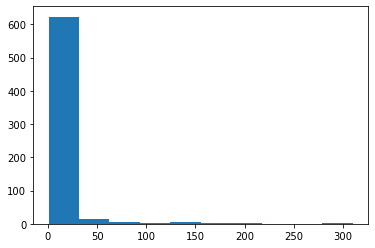

In [17]:
import matplotlib.pyplot as plt

plt.hist(data)

(array([ 95., 128., 104.,  80.,  86.,  41.,  26.,  23.,  14.,  11.]),
 array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5]),
 <BarContainer object of 10 artists>)

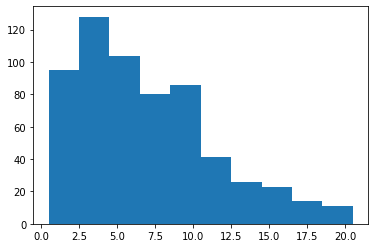

In [18]:
plt.hist(new_data)

In [19]:
df.shape

(653, 7)

In [23]:
# Max price
print('Maximum distance in our data :', df['MILES*'].max())
print('Minimum distance in our data :', df['MILES*'].min())
# data[data['price']==data.price.max()]

Maximum distance in our data : 310.3
Minimum distance in our data : 0.5


In [24]:
q25 = np.percentile(df['MILES*'], 25)
q75 = np.percentile(df['MILES*'], 75)
iqr = q75 - q25
limit_iqr = 1.5*iqr
lower_iqr = q25 - limit_iqr
upper_iqr = q75 + limit_iqr

In [25]:
print(q25)
print(q75)
print(iqr)
print(lower_iqr)
print(upper_iqr)

3.2
10.4
7.2
-7.6000000000000005
21.200000000000003


In [26]:
outliers_index_iqr = [x for x in df['MILES*'] if x < lower_iqr or x > upper_iqr]
data_new_iqr = [x for x in df['MILES*'] if x >= lower_iqr and x <= upper_iqr]

In [29]:
len(outliers_index_iqr)

45

In [30]:
data_new_iqr

[5.1,
 4.8,
 4.7,
 4.3,
 7.1,
 0.8,
 8.3,
 16.5,
 10.8,
 7.5,
 6.2,
 6.4,
 1.6,
 1.7,
 1.9,
 1.9,
 4.0,
 1.8,
 2.4,
 2.0,
 15.1,
 11.2,
 11.8,
 3.9,
 8.0,
 10.4,
 10.4,
 4.8,
 4.7,
 7.6,
 17.1,
 15.1,
 1.6,
 2.4,
 1.0,
 2.0,
 2.3,
 1.9,
 1.4,
 0.5,
 1.8,
 18.7,
 3.4,
 2.7,
 12.9,
 19.0,
 14.7,
 15.7,
 4.6,
 5.2,
 10.4,
 10.1,
 5.8,
 5.5,
 5.7,
 5.7,
 19.4,
 3.9,
 8.3,
 6.0,
 1.6,
 5.2,
 9.7,
 1.6,
 1.1,
 1.6,
 9.0,
 7.7,
 10.4,
 10.4,
 11.4,
 9.0,
 3.2,
 5.6,
 5.7,
 6.1,
 6.1,
 4.3,
 2.7,
 6.1,
 17.3,
 5.7,
 13.5,
 6.1,
 8.5,
 2.6,
 17.0,
 18.0,
 8.4,
 11.5,
 8.9,
 8.1,
 2.0,
 13.0,
 13.9,
 1.8,
 1.1,
 3.6,
 14.7,
 1.7,
 0.5,
 12.7,
 6.0,
 5.2,
 10.0,
 18.3,
 11.2,
 7.6,
 7.3,
 3.2,
 7.7,
 2.4,
 4.6,
 8.8,
 8.3,
 13.0,
 8.1,
 2.2,
 20.0,
 8.1,
 1.7,
 3.1,
 3.2,
 6.0,
 5.8,
 10.6,
 9.9,
 7.7,
 6.8,
 3.8,
 5.6,
 6.6,
 8.0,
 8.0,
 2.3,
 5.2,
 7.6,
 17.3,
 9.9,
 9.9,
 10.4,
 10.9,
 15.7,
 4.9,
 0.8,
 13.5,
 1.9,
 2.0,
 6.5,
 7.8,
 7.8,
 3.9,
 2.8,
 12.4,
 5.9,
 9.4,
 11.9,
 7.2,
 7.6,
 8.4

In [31]:
len(data_new_iqr)

608

In [35]:
# IQR method
Q11 = df['MILES*'].quantile(0.25)
Q31 = df['MILES*'].quantile(0.75)
IQR1 = Q31-Q11

In [38]:
Q11,Q31,IQR1

(3.2, 10.4, 7.2)

In [39]:
lower_iqr = Q11 - 1.5*IQR1
upper_iqr = Q31 + 1.5*IQR1

In [40]:
lower_iqr, upper_iqr

(-7.6000000000000005, 21.200000000000003)

In [42]:
df[df['MILES*'] > upper_iqr].shape # check number of outliers > upper_iqr

(45, 7)

In [44]:
df[df['MILES*'] < lower_iqr].shape # check number of outliers < lower_iqr

(0, 7)

In [45]:
new_df = df[-((df['MILES*'] > upper_iqr))] # remove 45 instances which are outliers > upper_iqr above

In [47]:
new_df.shape

(608, 7)

(array([ 95., 128., 104.,  80.,  86.,  41.,  26.,  23.,  14.,  11.]),
 array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5]),
 <BarContainer object of 10 artists>)

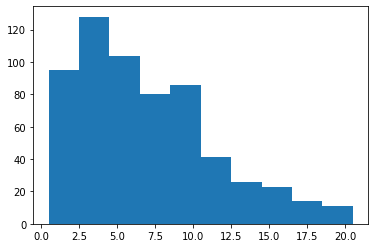

In [50]:
plt.hist(new_df['MILES*'].values)